In [2]:
from codes.python import load_database,ECG_denoising
from codes.python import QRS_detector
import numpy as np
from scipy.signal import resample
from scipy.signal import savgol_filter
import operator
from numpy import array
import sys
import csv
import os
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing, plot
from codes.python import heartbeat_segmentation as shs
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from codes.python import curve_smoothing 

In [3]:
mitdb = load_database.load_mitdb()
mitdb.segment_beats()


C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/100
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/101
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/101.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/101.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/101pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/102
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/102.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/102.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/102pt

C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/201.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/201pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/202
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/202.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/202.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/202pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/203
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/203.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/203.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/203pt.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/205
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/205

Filtered MLII records from : 102
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 102 completes.
Start segmenting records: 103
Filtered MLII records from : 103
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 103 completes.
Start segmenting records: 104
Filtered MLII records from : 104
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 104 completes.
Start segmenting records: 105
Filtered MLII records from : 105
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 105 completes.
Start segmenting records: 106
Filtered MLII records from : 106
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 106 completes.
Start segmenting records: 107
Filtered MLII records from : 107
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 107 completes.
Start segmenting records: 108
Filtered MLII records from : 108
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 108 completes.
Start segmentin

In [194]:
def find_S_point(signal,time, time_limit, R_peaks,limit=50):
    num_peak = len(R_peaks)
    S_points = []   
    for i in range(num_peak):
        #print(i)
        r_peak = R_peaks[i]
        point = r_peak
        if point+1 >= len(signal):
            #print("here")
            break
        
        if(signal[point] >= 0 ):
            while point <= R_peaks[i] + limit and signal[point] >= signal[point + 1] or abs(time[point]-time[r_peak]) <= time_limit:             
                point += 1
                if point >= len(signal):
                    #print("here")
                    break
        else:
            
            while  point <= R_peaks[i] + limit and abs(signal[point]) >= abs(signal[point + 1]) or abs(time[point]-time[r_peak]) <= time_limit:             
                point += 1
                if point >= len(signal):
                    #print("here")
                    break
        
        S_points.append(point)
                #print(point)
                        
    return np.asarray(S_points)






In [167]:

def find_S_point(ecg, R_peaks):
    num_peak=R_peaks.shape[0]
    S_point=list()
    for index in range(num_peak):
        i=R_peaks[index]
        cnt=i
        if cnt+1>=ecg.shape[0]:
            break
        while ecg[cnt]>ecg[cnt+1]:
            cnt+=1
            if cnt>=ecg.shape[0]:
                break
        S_point.append(cnt)
    return np.asarray(S_point)

In [5]:
mit208 = load_database.load_patient_record("mitdb","208")
mit208.set_segmented_beats_r_pos(winL=100,winR=200)
np100 = mit208.filtered_MLII




C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/208
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/208.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/208.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/208pt.csv
Start segmenting records: 208
Filtered MLII records from : 208
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 208 completes.


In [6]:
indexes = list(range(0,30000))

r_peaks = np.asarray(r_peak_detector(np100,mit208.annotations,indexes))
#len(np100)
s_points = find_S_point(np100[indexes],r_peaks)

wfdb.plot_items(signal=np100[indexes], ann_samp=[s_points])

len(r_peaks)
#len(r_peaks)


NameError: name 'r_peak_detector' is not defined

In [192]:
def segment(signal,pos,winL,winR,size_RR_max):
    lst = list(signal[pos - size_RR_max : pos + size_RR_max])
    
    
    if(signal[pos] < 0):
        #print("here less than 0", signal[pos])
        #pos = pos
        beat_pos = [abs(x) for x in lst]
        beat_pos = enumerate(beat_pos)
        index, value  = max(beat_pos, key=operator.itemgetter(1))
        pos = (pos - size_RR_max) + index
    
    else:
        #print("here more or equal than 0", signal[pos])
        beat_pos = enumerate(lst)
        index, value  = max(beat_pos, key=operator.itemgetter(1))
        pos = (pos - size_RR_max) + index

    beat_poses = list(range(pos - winL, pos + winR))
    beat_poses = [int(i) for i in beat_poses]
    return beat_poses,pos



def r_peak_detector(signal,annotations,indexes,  winL=180, winR=180,size_RR_max=5):
    
    R_poses = []
    class_AAMI = -1
    original_r = []
    for a in annotations:
        aS = a.split()
        pos = int(aS[1])
        
        
        if(len(signal) < len(indexes)):
            #print("here")
            break

        if(indexes[len(indexes)-1] < pos):
            #print("here")
            break
        if(indexes[0] > pos): 
            #print(pos)
            continue

        originalPos = int(aS[1])
        classAnttd = str(aS[2])
        if pos > size_RR_max and pos < (len(signal) - size_RR_max):
            #print("here")
            beat_poses,pos=segment(signal,pos,winL,winR, size_RR_max)
            pos = pos - indexes[0]
            if(pos > winL and pos < (len(indexes) - winR)):
                originalPos = originalPos - indexes[0]
                original_r.append(originalPos)
                R_poses.append(pos)
                
    return R_poses, original_r


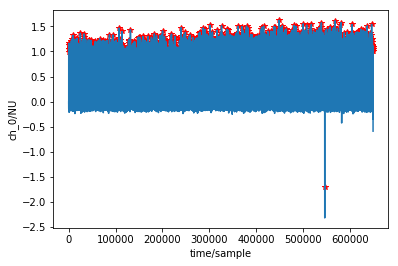

2271

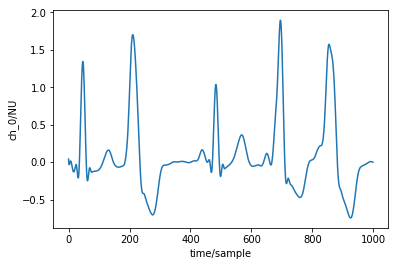

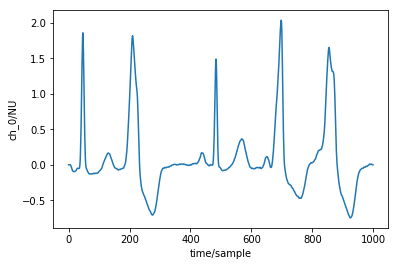

In [8]:
filtered_np100 = savgol_filter(np100,51,7)
wfdb.plot_items(signal=filtered_np100[0:1000])
wfdb.plot_items(signal=np100[0:1000])



In [9]:
r_peaks = np.asarray(shs.r_peak_detector(filtered_np100[0:10000],mit123.annotations,indexes))
s_points = find_S_point(filtered_np100[0:10000],r_peaks)
wfdb.plot_items(signal=filtered_np100[0:10000],ann_samp=[s_points])



NameError: name 'mit123' is not defined

In [10]:

def average(numbers):
    return float(sum(numbers)) / len(numbers)

for i in range(0,len(s_points)):
        
        diff=round(mit123.filtered_MLII[r_peaks[i]] - mit123.filtered_MLII[s_points[i]],2)
        r_peaks_values.append(mit123.filtered_MLII[r_peaks[i]])
        s_points_values.append(mit123.filtered_MLII[s_points[i]])
        diffs.append(diff)


x ,y  = np.unique(diffs, return_counts=True) # counting occurrence of each loan
min(diffs)
plt.scatter(x,y)
plt.show()

NameError: name 's_points' is not defined

In [195]:

r_peaks_values = []
s_points_values = []

all_diffs = []
all_diff_time = []
max_diff = 4
min_diff = 0

max_diffs = []
min_diffs = []
min_time_diff = []
max_time_diff = []
max_time = 0.3
min_time = 0.005

for i in mitdb.patient_records:
    
    mintimes = []
    maxtimes = []
    diffs_time = []
    diffs = []
    #filtered_signal = savgol_filter(i.filtered_MLII,51,7)
    filtered_signal = i.filtered_MLII
    indexes = list(range(0,len(filtered_signal)))
    r_peaks,original = np.asarray(r_peak_detector(filtered_signal,i.annotations, indexes))
    
    s_points = find_S_point(filtered_signal,i.time,0.01, r_peaks)

    for j in range(0,len(s_points)):
        diff=round(i.filtered_MLII[r_peaks[j]] - i.filtered_MLII[s_points[j]],2)
        diff_time = round(i.time[s_points[j]]-i.time[r_peaks[j]],3)
        if(diff<= min_diff):
            min_diffs.append([i.filename,r_peaks[j],diff])
        if(diff>=max_diff):
            max_diffs.append([i.filename,r_peaks[j],diff])
        if(diff_time <= min_time):
            mintimes.append([i.filename,r_peaks[j],diff_time])
        if(diff_time >= max_time):
            maxtimes.append([i.filename,r_peaks[j],diff_time])
        
        diffs.append(diff) 
        diffs_time.append(diff_time)
    all_diffs.extend(diffs)
   
    min_time_diff.extend(mintimes)
    max_time_diff.extend(maxtimes)
    all_diff_time.extend(diffs_time)


In [160]:
min_diffs

[['101', 40607, 0.0],
 ['101', 41934, 0.0],
 ['101', 308298, 0.0],
 ['102', 62964, 0.0],
 ['103', 413371, 0.0],
 ['103', 468223, 0.0],
 ['103', 478389, 0.0],
 ['103', 594881, 0.0],
 ['104', 32307, 0.0],
 ['104', 36951, 0.0],
 ['104', 42140, 0.0],
 ['104', 59672, 0.0],
 ['104', 65193, 0.0],
 ['104', 69135, 0.0],
 ['104', 74861, 0.0],
 ['104', 75778, 0.0],
 ['104', 76078, 0.0],
 ['104', 77660, 0.0],
 ['104', 79386, 0.0],
 ['104', 90735, 0.0],
 ['104', 93602, 0.0],
 ['104', 103636, 0.0],
 ['104', 138497, 0.0],
 ['104', 151611, 0.0],
 ['104', 170497, 0.0],
 ['104', 178052, 0.0],
 ['104', 185654, 0.0],
 ['104', 208868, 0.0],
 ['104', 217301, 0.0],
 ['104', 540420, 0.0],
 ['104', 589797, 0.0],
 ['105', 30743, 0.0],
 ['105', 98625, 0.0],
 ['105', 102560, 0.0],
 ['105', 106667, 0.0],
 ['105', 111362, 0.0],
 ['105', 124204, 0.0],
 ['105', 158590, 0.0],
 ['105', 225235, 0.0],
 ['105', 237776, 0.0],
 ['105', 248884, 0.0],
 ['105', 277820, 0.0],
 ['105', 313882, 0.0],
 ['105', 314410, 0.0],
 ['105

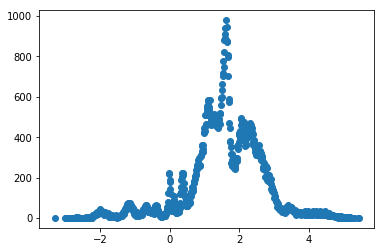

In [196]:
x ,y  = np.unique(all_diffs, return_counts=True) # counting occurrence of each 
plt.scatter(x,y)

In [11]:
average(all_diffs)

1.7234830861641335

In [100]:
max(y)

7600

In [13]:
np.where(y==1135)

(array([0], dtype=int64),)

In [14]:
max(x)

5.44

In [101]:
min_diffs

[['100', 546793, 0.0],
 ['101', 40599, 0.0],
 ['101', 41934, 0.0],
 ['101', 63416, 0.0],
 ['101', 114685, 0.0],
 ['101', 114700, 0.0],
 ['101', 115128, 0.0],
 ['101', 115480, 0.0],
 ['101', 308295, 0.0],
 ['102', 27246, 0.0],
 ['102', 34060, 0.0],
 ['102', 62964, 0.0],
 ['102', 354044, 0.0],
 ['102', 356125, 0.0],
 ['102', 371886, 0.0],
 ['102', 414790, 0.0],
 ['102', 443355, 0.0],
 ['102', 450830, 0.0],
 ['102', 457973, 0.0],
 ['102', 505325, 0.0],
 ['102', 508163, 0.0],
 ['102', 528457, 0.0],
 ['102', 544545, 0.0],
 ['102', 564059, 0.0],
 ['102', 584655, 0.0],
 ['102', 590297, 0.0],
 ['102', 645412, 0.0],
 ['103', 413362, 0.0],
 ['103', 468223, 0.0],
 ['103', 478380, 0.0],
 ['103', 594881, 0.0],
 ['104', 12042, 0.0],
 ['104', 32307, 0.0],
 ['104', 36951, 0.0],
 ['104', 42131, 0.0],
 ['104', 51012, 0.0],
 ['104', 59672, 0.0],
 ['104', 65193, 0.0],
 ['104', 69126, 0.0],
 ['104', 74861, 0.0],
 ['104', 75778, 0.0],
 ['104', 76078, 0.0],
 ['104', 77651, 0.0],
 ['104', 79386, 0.0],
 ['104'

In [18]:
max_diffs[1]

['107', 270, 4.39]

In [19]:
len(max_diffs)
for i in range (0, len(mitdb.patient_records)):
    print(mitdb.patient_records[i].filename, i)

100 0
101 1
102 2
103 3
104 4
105 5
106 6
107 7
108 8
109 9
111 10
112 11
113 12
114 13
115 14
116 15
117 16
118 17
119 18
121 19
122 20
123 21
124 22
200 23
201 24
202 25
203 26
205 27
207 28
208 29
209 30
210 31
212 32
213 33
214 34
215 35
217 36
219 37
220 38
221 39
222 40
223 41
228 42
230 43
231 44
232 45
233 46
234 47


In [102]:
mit108 = mitdb.patient_records[8]

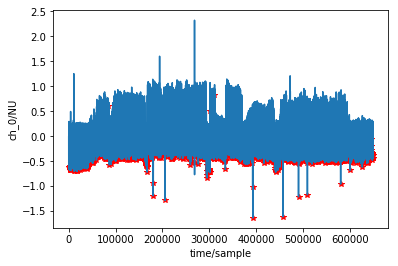

In [103]:
mit108_sub = mit108.filtered_MLII
r_peaks,original = np.asarray(r_peak_detector(mit108_sub,mit108.annotations,indexes))

s_points = find_S_point(mit108_sub,r_peaks)

wfdb.plot_items(signal=mit108_sub,ann_samp=[s_points])


In [18]:
indexes = list(range(len(mit107.filtered_MLII)-3000,len(mit107.filtered_MLII)))
mit107_sub = mit107.filtered_MLII[len(mit107.filtered_MLII)-3000:len(mit107.filtered_MLII)]
r_peaks  = processing.xqrs_detect(sig=mit107_sub, fs=mit107.fields['fs'])
r_peak = np.asarray(shs.r_peak(mit107_sub,r_peaks))


Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.


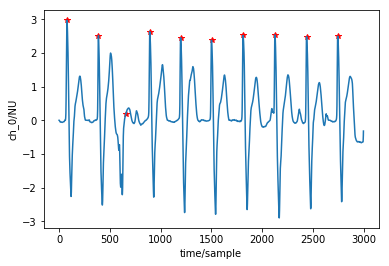

In [22]:
s_points  = find_S_point(mit107_sub,r_peak)

wfdb.plot_items(signal=mit107_sub,ann_samp=[r_peaks])



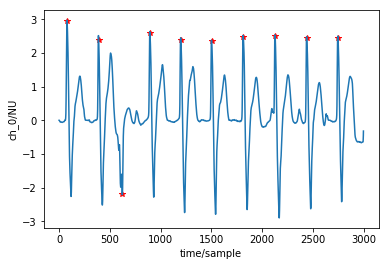

array([  78,  390,  624,  895, 1200, 1503, 1815, 2129, 2441, 2748])

In [23]:
indexes = list(range(len(mit107.filtered_MLII)-3000,len(mit107.filtered_MLII)))
mit107_sub = mit107.filtered_MLII[indexes]
beat_class, class_ID, r_poses,originalPoses = shs.r_peak_and_annotation(mit107.filtered_MLII,mit107.annotations,indexes)
r_peaks = np.asarray(r_poses)
orignal_r = np.asarray(originalPoses)
wfdb.plot_items(signal=mit107_sub,ann_samp=[orignal_r])
orignal_r

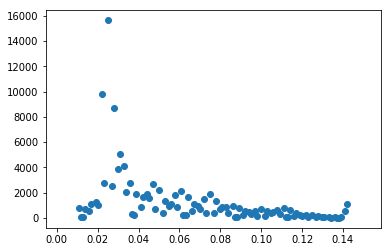

112543

In [197]:
x ,y  = np.unique(all_diff_time , return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)
plt.show()
len(all_diffs)

In [18]:
max(y)
np.where(y==max(y))
x[17]

0.025

In [19]:
min_time_diff

[['101', 40607, 0.0],
 ['101', 41934, 0.0],
 ['101', 308298, 0.0],
 ['103', 413371, 0.0],
 ['103', 468223, 0.0],
 ['103', 478389, 0.0],
 ['104', 42140, 0.0],
 ['104', 59672, 0.0],
 ['104', 65193, 0.0],
 ['104', 69135, 0.0],
 ['104', 74861, 0.0],
 ['104', 75778, 0.0],
 ['104', 76078, 0.0],
 ['104', 77660, 0.0],
 ['104', 90735, 0.0],
 ['104', 93602, 0.0],
 ['104', 103636, 0.0],
 ['104', 151611, 0.0],
 ['104', 185654, 0.0],
 ['104', 208868, 0.0],
 ['104', 217301, 0.005],
 ['104', 391237, 0.003],
 ['104', 540420, 0.0],
 ['104', 589797, 0.0],
 ['105', 30743, 0.0],
 ['105', 98625, 0.0],
 ['105', 102560, 0.0],
 ['105', 106667, 0.0],
 ['105', 111362, 0.0],
 ['105', 124204, 0.0],
 ['105', 158590, 0.0],
 ['105', 225235, 0.0],
 ['105', 237776, 0.0],
 ['105', 248884, 0.0],
 ['105', 277820, 0.0],
 ['105', 313882, 0.0],
 ['105', 314410, 0.0],
 ['105', 315509, 0.0],
 ['105', 363167, 0.0],
 ['105', 364051, 0.0],
 ['105', 374881, 0.0],
 ['105', 376050, 0.0],
 ['105', 383258, 0.0],
 ['105', 384799, 0.0]

In [22]:
mit105 = mitdb.patient_records[5]

In [23]:
indexes = list(range(len(mit105.filtered_MLII)-20000,len(mit105.filtered_MLII)-10000))
#indexes = list(range(0,len(mit105.filtered_MLII)))
mit105_sub = mit105.filtered_MLII[indexes]
beat_class, class_ID, r_poses,originalPoses = shs.r_peak_and_annotation(mit105.filtered_MLII,mit105.annotations,indexes)
r_peaks = np.asarray(r_poses)
orignal_r = np.asarray(originalPoses)


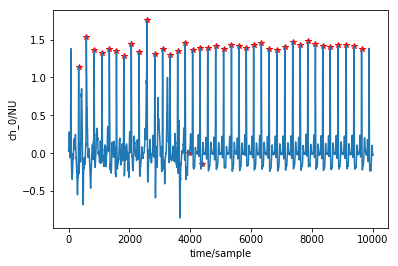

In [24]:
wfdb.plot_items(signal=mit105_sub,ann_samp=[r_peaks])


In [25]:
s_points = find_S_point(mit105_sub, r_peaks)


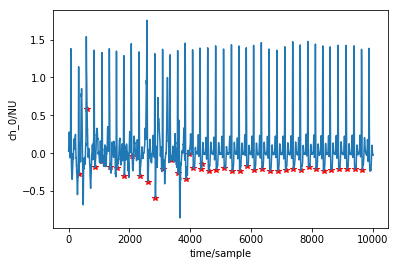

In [26]:
wfdb.plot_items(signal=mit105_sub,ann_samp=[s_points])


In [27]:
mit207 = mitdb.patient_records[28]


In [81]:
indexes = list(range(len(mit105.filtered_MLII)-20000,len(mit105.filtered_MLII)))
#indexes = list(range(0,len(mit105.filtered_MLII)))
mit207_sub = mit207.filtered_MLII[indexes]
#beat_class, class_ID, r_poses,originalPoses = shs.r_peak_and_annotation(mit207.filtered_MLII,mit207.annotations,indexes)
r_poses, originalPoses = r_peak_detector(mit207.filtered_MLII,mit207.annotations,indexes)
r_peaks = np.asarray(r_poses)
orignal_r = np.asarray(originalPoses)
#len(r_peaks)
len(orignal_r)




109

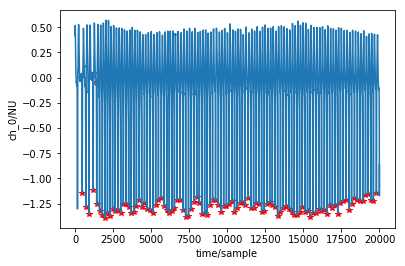

In [82]:
wfdb.plot_items(signal=mit207_sub,ann_samp=[r_peaks])


In [62]:
import random
ran_nums = []
for x in range(10):
  ran_nums.append(random.randint(-5,1))

In [66]:
ran_nums
ran_nums = [abs(x) for x in ran_nums]


In [67]:
ran_nums

[0, 1, 5, 1, 1, 1, 2, 4, 4, 1]

In [267]:
def find_Q_point(signal,time, time_limit, R_peaks,limit=50):
    num_peak = len(R_peaks)
    Q_points = []   
    for i in range(num_peak):
        #print(i)
        r_peak = R_peaks[i]
        point = r_peak
        if point-1 >= len(signal):
            print("here", str(i))
            
            break
        
        if(signal[point] >= 0 ):
            while point >= R_peaks[i] - limit and signal[point] >= signal[point - 1] or abs(time[r_peak]-time[point]) <= time_limit:             
                point -= 1
                print(str(abs(time[r_peak]-time[point])), " ", + time_limit, point, signal[point] >= signal[point - 1], abs(time[r_peak]-time[point]) <= time_limit )
                if point >= len(signal):
                    #print("here")
                    break
        else:
            
            while point >= R_peaks[i] - limit and abs(signal[point]) >= abs(signal[point - 1]) or abs(time[r_peak]-time[point]) <= time_limit:             
                point -= 1
                print(str(abs(time[r_peak]-time[point])), " ", + time_limit, point, abs(signal[point]) >= abs(signal[point - 1]), abs(time[r_peak]-time[point]) <= time_limit)
                if point <= len(signal):
                    #print("here")
                    break
        
        Q_points.append(point)
        print(point)
                        
    return np.asarray(Q_points)

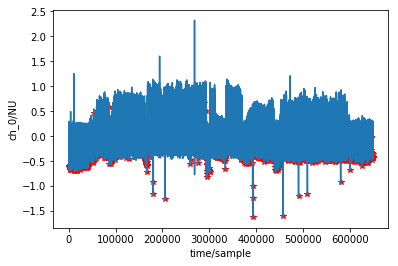

In [220]:
mit108 = mitdb.patient_records[8]
mit108_sub = mit108.filtered_MLII

r_peaks,original = np.asarray(r_peak_detector(mit108_sub,mit108.annotations,indexes))

Q_points = find_Q_point(mit108_sub,mit108.time,0.01,r_peaks)

wfdb.plot_items(signal=mit108_sub,ann_samp=[Q_points])


In [ ]:
mit105 = mitdb.patient_records[5]

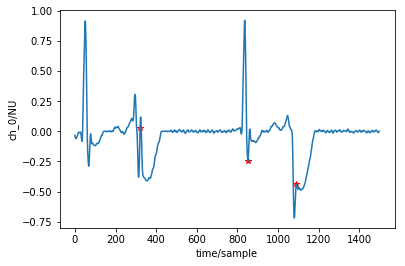

In [248]:
indexes = list(range(len(mit105.filtered_MLII)-1000,len(mit105.filtered_MLII)))

indexes = list(range(0,1500))
mit207_sub = mit207.filtered_MLII[indexes]
time = np.asarray(mit207.time)
mit207_time = time[indexes]
#beat_class, class_ID, r_poses,originalPoses = shs.r_peak_and_annotation(mit207.filtered_MLII,mit207.annotations,indexes)
r_poses, originalPoses = r_peak_detector(mit207.filtered_MLII,mit207.annotations,indexes)
r_peaks = np.asarray(r_poses)
orignal_r = np.asarray(originalPoses)
#len(r_peaks)
len(orignal_r)
Q_points = find_Q_point(mit207_sub,mit207_time,0.01,r_peaks)
S_points = find_S_point(mit207_sub,mit207_time,0.01,r_peaks)
wfdb.plot_items(signal=mit207_sub,ann_samp=[S_points])


In [250]:
mit100 = mitdb.patient_records[0]

0.0029999999999998916   0.01 370 True True
0.006000000000000005   0.01 369 True True
0.008999999999999897   0.01 368 True True
0.01200000000000001   0.01 367 True False
0.014000000000000012   0.01 366 True False
0.016999999999999904   0.01 365 True False
0.020000000000000018   0.01 364 True False
0.02299999999999991   0.01 363 True False
0.02499999999999991   0.01 362 True False
0.028000000000000025   0.01 361 True False
0.030999999999999917   0.01 360 False False
360
0.0030000000000001137   0.01 662 True True
0.006000000000000005   0.01 661 True True
0.009000000000000119   0.01 660 True True
0.01100000000000012   0.01 659 True False
0.014000000000000012   0.01 658 True False
0.017000000000000126   0.01 657 True False
0.020000000000000018   0.01 656 True False
0.02300000000000013   0.01 655 True False
0.025000000000000133   0.01 654 True False
0.028000000000000025   0.01 653 False False
653
0.0029999999999996696   0.01 946 True True
0.005999999999999783   0.01 945 True True
0.008999999

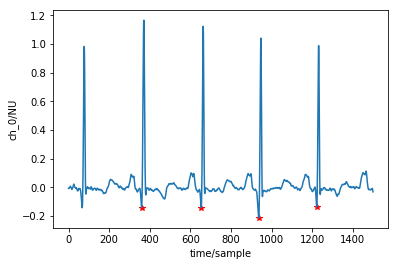

In [270]:
indexes = list(range(len(mit100.filtered_MLII)-1000,len(mit100.filtered_MLII)))

indexes = list(range(0,1500))
mit100_sub = mit100.filtered_MLII[indexes]
time = np.asarray(mit100.time)
mit100_time = time[indexes]
#beat_class, class_ID, r_poses,originalPoses = shs.r_peak_and_annotation(mit207.filtered_MLII,mit207.annotations,indexes)
r_poses, originalPoses = r_peak_detector(mit100.filtered_MLII,mit100.annotations,indexes)
r_peaks = np.asarray(r_poses)
orignal_r = np.asarray(originalPoses)
#len(r_peaks)
len(orignal_r)
Q_points = find_Q_point(mit100_sub,mit100_time,0.01,r_peaks)
S_points = find_S_point(mit100_sub,mit100_time,0.4,r_peaks)
wfdb.plot_items(signal=mit100_sub,ann_samp=[Q_points])